In [1]:
from analytics_workbench.read_data import DataReader
from analytics_workbench.preprocessing import PreProcessor
from analytics_workbench.unsupervised_learning import Unsupervised
from analytics_workbench.supervised_learning import ClassificationModelCV

In [2]:
reader = DataReader()
df = reader.read_excel('ecommerce_sample_data_for_ui_with_people1.xls')

In [3]:
df.head()

,name,designation,location_person,linkedin_url,company_name,no_of_employees,sector,company_type,headquarters,description,...,product_categories,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising,people_linkedin_url,first_name,middle_name,last_name,email
0,Aamir Baig,"Co-Founder, CEO Bryght.com",Canada,https://www.linkedin.com/company/bryght-com,Bryght.com,11-50 employees,Retail,Privately Held,"520 Alexander St Vancouver, BC V6A 1C7 Canada",Article (formerly Bryght) delivers beautifully...,...,NaN,0,1,1,1,https://www.linkedin.com/in/abaig,Aamir,NaN,Baig,Aamir.Baig@article.com
1,Aaron Beadle,Head of Infrastructure & Technology at Flubit ...,"Chelmsford, United Kingdom",https://www.linkedin.com/company/flubit-limited,Flubit,51-200 employees,Retail,Privately Held,"Metropolitan Wharf Wapping London, E1W 3SS Uni...",Found something you want to buy online? Want ...,...,NaN,0,0,0,0,https://www.linkedin.com/in/aaron-beadle-58b80342,Aaron,NaN,Beadle,Aaron.Beadle@flubit.com
2,Aaron Duncan,Chief Marketing Officer & Creative Director at...,"New York, New York",https://www.linkedin.com/company/the-sak,The Sak,51-200 employees,Apparel & Fashion,Privately Held,United States,Longtime friends Mark Talucci and Todd Elliott...,...,NaN,0,0,0,1,https://www.linkedin.com/in/aaronjduncan,Aaron,NaN,Duncan,Aaron.Duncan@thesak.com
3,Aaron Firestein,Co-Founder and Chief Artist at BucketFeet,Greater Chicago Area,https://www.linkedin.com/company/bucketfeet,BucketFeet,11-50 employees,Apparel & Fashion,Privately Held,"935 West Randolph Floor Two Chicago, IL 60607 ...",About BucketFeet. BucketFeet’s mission is to c...,...,NaN,1,0,0,1,https://www.linkedin.com/in/aaron-firestein-3a...,Aaron,NaN,Firestein,Aaron.Firestein@bucketfeet.com
4,Aaron Harari,"President & CEO, Legwear. At Basic Resources, ...",Greater New York City Area,https://www.linkedin.com/company/basic-resourc...,"Basic Resources, Inc.",51-200 employees,Apparel & Fashion,Privately Held,"1411 Braodway 2nd Floor New York, New York 100...","Since our founding in 1993, Basic Resources ha...",...,NaN,1,1,0,0,https://www.linkedin.com/in/aaron-harari-53423213,Aaron,NaN,Harari,Aaron.Harari@basicresources.com


In [4]:
df.columns

Index(['name', 'designation', 'location_person', 'linkedin_url',
       'company_name', 'no_of_employees', 'sector', 'company_type',
       'headquarters', 'description', 'founded', 'specialties', 'website',
       'domain', 'location', 'region', 'country', 'wtech_names',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_amount', 'last_funded_at', 'funding_level',
       'funding_round_code', 'last_raised_amount_usd', 'valuation',
       'average_transaction_value', 'no_of_products', 'no_of_unique_visitors',
       'all_locations', 'channel_presence', 'market_place_type',
       'product_categories', 'browse_and_filter', 'faceted_search',
       'recommendation_coll_filtering', 'visual_merchandising',
       'people_linkedin_url', 'first_name', 'middle_name', 'last_name',
       'email'],
      dtype='object')

In [5]:
valid_cols = ['no_of_employees', 'sector', 'company_type', 'description', 'founded', 'specialties',
             'country','funding_rounds','funding_amount','no_of_products', 'no_of_unique_visitors',
             'channel_presence', 'market_place_type', 'browse_and_filter', 'faceted_search',
           'recommendation_coll_filtering', 'visual_merchandising']
df_valid = df[valid_cols]
df_valid.head()

,no_of_employees,sector,company_type,description,founded,specialties,country,funding_rounds,funding_amount,no_of_products,no_of_unique_visitors,channel_presence,market_place_type,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising
0,11-50 employees,Retail,Privately Held,Article (formerly Bryght) delivers beautifully...,2011.0,"Retail, Wholesale, Furniture, Dining Room Furn...",CANADA,NaN,NaN,"0-5,000","0-50,000",Online,Info Aggregator,0,1,1,1
1,51-200 employees,Retail,Privately Held,Found something you want to buy online? Want ...,2011.0,"ecommerce, native commerce, retail, online mar...",UNITED KINGDOM,NaN,NaN,"5,000-50,000","200,000-1,000,000",Online,Comparison Shopping,0,0,0,0
2,51-200 employees,Apparel & Fashion,Privately Held,Longtime friends Mark Talucci and Todd Elliott...,NaN,NaN,UNITED STATES,NaN,NaN,"500,000-1,000,000","1,000,000-5,000,000",Mobile,Peer-2-Peer,0,0,0,1
3,11-50 employees,Apparel & Fashion,Privately Held,About BucketFeet. BucketFeet’s mission is to c...,2011.0,"Footwear, Art, Fashion, E-Commerce",UNITED STATES,3.0,2160000.0,"500,000-1,000,000","5,000,000-10,000,000",MultiChannel,Merchants,1,0,0,1
4,51-200 employees,Apparel & Fashion,Privately Held,"Since our founding in 1993, Basic Resources ha...",1993.0,"Premier Global Manufacturer, Loungewear, Under...",UNITED STATES,NaN,NaN,"200,000-500,000","1,000,000-5,000,000",MultiChannel,Merchants,1,1,0,0


In [6]:
#some pre-processing
# filling missing values
df_valid[['no_of_employees','sector','company_type','country','channel_presence','market_place_type',
          'no_of_products','no_of_unique_visitors']] = \
df_valid[['no_of_employees','sector','company_type','country','channel_presence','market_place_type',
         'no_of_products','no_of_unique_visitors']].\
fillna('no data')
df_valid[['description','specialties']] = df_valid[['description','specialties']].fillna('')
df_valid[['funding_rounds','funding_amount']] = df_valid[['funding_rounds','funding_amount']].fillna(0)
df_valid[['browse_and_filter','faceted_search','recommendation_coll_filtering','visual_merchandising']] = \
df_valid[['browse_and_filter','faceted_search','recommendation_coll_filtering','visual_merchandising']].fillna(0)

#treating founded year : find how old is the company
df_valid['founded'] = 2017-df_valid['founded'].fillna(2017)

/Users/estajoswin/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/estajoswin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
df_valid.head()

,no_of_employees,sector,company_type,description,founded,specialties,country,funding_rounds,funding_amount,no_of_products,no_of_unique_visitors,channel_presence,market_place_type,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising
0,11-50 employees,Retail,Privately Held,Article (formerly Bryght) delivers beautifully...,6.0,"Retail, Wholesale, Furniture, Dining Room Furn...",CANADA,0.0,0.0,"0-5,000","0-50,000",Online,Info Aggregator,0,1,1,1
1,51-200 employees,Retail,Privately Held,Found something you want to buy online? Want ...,6.0,"ecommerce, native commerce, retail, online mar...",UNITED KINGDOM,0.0,0.0,"5,000-50,000","200,000-1,000,000",Online,Comparison Shopping,0,0,0,0
2,51-200 employees,Apparel & Fashion,Privately Held,Longtime friends Mark Talucci and Todd Elliott...,0.0,,UNITED STATES,0.0,0.0,"500,000-1,000,000","1,000,000-5,000,000",Mobile,Peer-2-Peer,0,0,0,1
3,11-50 employees,Apparel & Fashion,Privately Held,About BucketFeet. BucketFeet’s mission is to c...,6.0,"Footwear, Art, Fashion, E-Commerce",UNITED STATES,3.0,2160000.0,"500,000-1,000,000","5,000,000-10,000,000",MultiChannel,Merchants,1,0,0,1
4,51-200 employees,Apparel & Fashion,Privately Held,"Since our founding in 1993, Basic Resources ha...",24.0,"Premier Global Manufacturer, Loungewear, Under...",UNITED STATES,0.0,0.0,"200,000-500,000","1,000,000-5,000,000",MultiChannel,Merchants,1,1,0,0


In [8]:
#create a sample dv
from numpy.random import choice
dv = choice([0,1],df_valid.shape[0])

In [9]:
#train test split
from numpy.random import rand
msk = rand(df_valid.shape[0]) < 0.8
df_train,df_test,dv_train,dv_test = df_valid[msk],df_valid[~msk],dv[msk],dv[~msk]

In [10]:
# pre-processing module
from importlib import reload
import analytics_workbench.preprocessing
reload(analytics_workbench.preprocessing)
preprocessor = analytics_workbench.preprocessing.PreProcessor()
text_cols = ['description','specialties']
categorical_cols = ['no_of_employees','sector','company_type','country','channel_presence','market_place_type',
          'no_of_products','no_of_unique_visitors']
X_train = preprocessor.build_matrix_train(df_train,text_cols=text_cols,categorical_cols=categorical_cols,
                               vectorizer_type='Count',synonym_loc='sample_synonyms.txt',
                   stem_type='lemmatize',phrase_generation=False,stop_words_loc=None,lower=True,n_gram_range=(1,2),
                   max_df=0.9,min_df=0.01,vocabulary_loc=None,sparse_format=True)

/Users/estajoswin/Desktop/works/pipecandy/analytics_workbench/nlp-intelligence/analytics_workbench/analytics_workbench/preprocessing.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop(self.text_cols,axis=1,inplace=True)
/Users/estajoswin/Desktop/works/pipecandy/analytics_workbench/nlp-intelligence/analytics_workbench/analytics_workbench/preprocessing.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop(self.categorical_cols,axis=1,inplace=True)
/Users/estajoswin/Desktop/works/pipecandy/analytics_workbench/nlp-intelligence/analytics_workbench/analytics_workbench/preprocessing.py:90: SettingWithCopyWarning: 
A value is trying to be se

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/estajoswin/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

In [23]:
df_valid.head()

,no_of_employees,sector,company_type,description,founded,specialties,country,funding_rounds,funding_amount,no_of_products,no_of_unique_visitors,channel_presence,market_place_type,browse_and_filter,faceted_search,recommendation_coll_filtering,visual_merchandising
0,11-50 employees,Retail,Privately Held,Article (formerly Bryght) delivers beautifully...,6.0,"Retail, Wholesale, Furniture, Dining Room Furn...",CANADA,0.0,0.0,"0-5,000","0-50,000",Online,Info Aggregator,0,1,1,1
1,51-200 employees,Retail,Privately Held,Found something you want to buy online? Want ...,6.0,"ecommerce, native commerce, retail, online mar...",UNITED KINGDOM,0.0,0.0,"5,000-50,000","200,000-1,000,000",Online,Comparison Shopping,0,0,0,0
2,51-200 employees,Apparel & Fashion,Privately Held,Longtime friends Mark Talucci and Todd Elliott...,0.0,,UNITED STATES,0.0,0.0,"500,000-1,000,000","1,000,000-5,000,000",Mobile,Peer-2-Peer,0,0,0,1
3,11-50 employees,Apparel & Fashion,Privately Held,About BucketFeet. BucketFeet’s mission is to c...,6.0,"Footwear, Art, Fashion, E-Commerce",UNITED STATES,3.0,2160000.0,"500,000-1,000,000","5,000,000-10,000,000",MultiChannel,Merchants,1,0,0,1
4,51-200 employees,Apparel & Fashion,Privately Held,"Since our founding in 1993, Basic Resources ha...",24.0,"Premier Global Manufacturer, Loungewear, Under...",UNITED STATES,0.0,0.0,"200,000-500,000","1,000,000-5,000,000",MultiChannel,Merchants,1,1,0,0


In [4]:
predictive_model = ClassificationModelCV(model_algorithm='svm',scoring='f1_weighted')

In [5]:
predictive_model.fit(df.iloc[:,:-1],df.iloc[:,-1])

/Users/estajoswin/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/estajoswin/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/estajoswin/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/estajoswin/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/e

In [6]:
predictive_model.clf_search.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'kernel': 'poly'}

In [7]:
from model_diagnostics import ClassificationModelDiagnotstics
diagnost = ClassificationModelDiagnotstics()

classification report
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.97      0.99      0.98       182
          2       1.00      0.99      1.00       177
          3       0.99      0.98      0.98       183
          4       0.99      0.99      0.99       181
          5       0.97      0.97      0.97       182
          6       0.99      0.98      0.99       181
          7       0.98      0.94      0.96       179
          8       0.98      0.97      0.97       174
          9       0.93      0.97      0.95       180

avg / total       0.98      0.98      0.98      1797



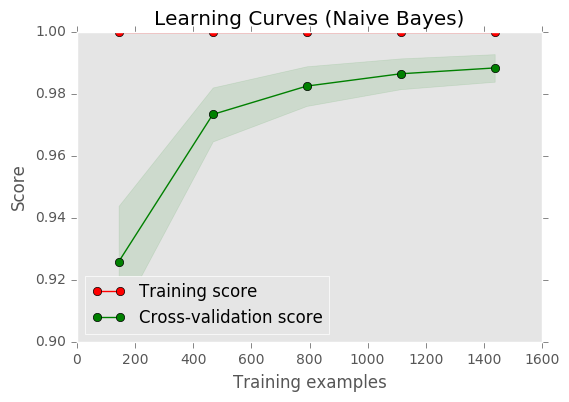

In [8]:
diagnost.run_diagnostics(predictive_model.clf_search.best_estimator_,df.iloc[:,:-1],df.iloc[:,-1],False)

1